# developing the heat equation into a numeric approximation

$$\frac{\partial T}{\partial t}=k\frac{\partial^{2}T}{\partial x^{2}}$$

$$\lim_{dt\rightarrow0}\frac{T\left(t+dt,x\right)-T\left(t,x\right)}{dt}=k\lim_{dx\rightarrow0}\frac{T\left(x+dx,t\right)-2T\left(x,t\right),T\left(x-dx,t\right)}{dx}$$

## we will approximate
$$dt\approx0, dx\approx0$$

$$\frac{T\left(t+dt,x\right)-T\left(t,x\right)}{dt}\approx k\frac{T\left(t,x+dx\right)-2T\left(t,x\right)+T\left(t,x-dx\right)}{dx^{2}}$$

$$T\left(t+dt,x\right)\approx k\frac{\left(T\left(t,x+dx\right)-2T\left(t,x\right)+T\left(t,x-dx\right)\right)dt}{dx^{2}}+T\left(t,x\right)$$

$$T\left(t+dt,x\right)\approx k\frac{\left(\left(T\left(t,x+dx\right)-T\left(t,x\right)\right)-\left(T\left(t,x\right)-T\left(t,x-dx\right)\right)\right)dt}{dx^{2}}+T\left(t,x\right)$$

## Basic Functions
The following code contains the basic functions that will be used to simulate the heat equation.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import plotly.graph_objects as go


length = 10
dx=0.1
k = 0.466
t = 10000
delta_t = 0.001


def heat_equation(simulation:np.ndarray,t:int,x:int,k:float,delta_t:float)->float:
    """ 
    function that accepts the location of a point in the rod and the time and returns it's temperature
    dT/dt = k/2((T3-T2)-(T2-T1)) is the change in temperature
    and then according to euler
    T = dT/dt*delta_t+T2)
    """
    T1=simulation[t,x-1]
    T2=simulation[t,x]
    T3=simulation[t,x+1]
    # Here is the numerical approximation of the heat equation
    derTemp = k*(((T3-T2)-(T2-T1))/dx**2) 
    return derTemp*delta_t+T2

def heat_simulation(init_conditions:np.ndarray,p_amnt:float,k:float,t:float,delta_t:float):
    """ this constructs the 1d heat simulation
    """
    simulation = np.zeros(shape=(t,p_amnt))
    simulation[0,0:p_amnt]=init_conditions
    for i in range(1,t):
        for j in range(1,p_amnt-1):
            simulation[i,j]=heat_equation(simulation,i-1,j,k,delta_t)
        simulation[i,p_amnt-1]=simulation[i,p_amnt-3]
        simulation[i,0]=simulation[i,2]
    return simulation

## Simulation

In [7]:
# Define grid
x_values = np.linspace(0, length, int(length / dx) + 2)
t_values = np.arange(0, t, 1)
X, T = np.meshgrid(x_values, t_values)

init_conditions = np.sin(2*np.pi / 10 * x_values)
simulation = heat_simulation(init_conditions,len(x_values),k,t,delta_t)
simulation

array([[ 0.00000000e+00,  6.21696374e-02,  1.24098753e-01, ...,
        -1.24098753e-01, -6.21696374e-02, -2.44929360e-16],
       [ 1.24076379e-01,  6.21584291e-02,  1.24076379e-01, ...,
        -1.24076379e-01, -6.21584291e-02, -1.24076379e-01],
       [ 1.24054010e-01,  6.79291821e-02,  1.24054010e-01, ...,
        -1.24054010e-01, -6.79291821e-02, -1.24054010e-01],
       ...,
       [ 5.40580603e-01,  5.40824271e-01,  5.40580603e-01, ...,
        -5.40580603e-01, -5.40824271e-01, -5.40580603e-01],
       [ 5.40557893e-01,  5.40801561e-01,  5.40557893e-01, ...,
        -5.40557893e-01, -5.40801561e-01, -5.40557893e-01],
       [ 5.40535182e-01,  5.40778851e-01,  5.40535182e-01, ...,
        -5.40535182e-01, -5.40778851e-01, -5.40535182e-01]])

## 3D Plotting of the Simulation
Here we plot the simulation in 3D using plotly. The axes are the position on the rod, the time, and the temperature.

In [8]:

# Create figure
fig = go.Figure(data=[go.Surface(x=X, y=T, z=simulation, colorscale='viridis')])

# Update layout
fig.update_layout(scene=dict(xaxis_title='Position',
                             yaxis_title='Time',
                             zaxis_title='Temperature'),
                  title='Temperature Distribution Over Time',
                  template='plotly_white')

# Save as interactive HTML file
fig.write_html('interactive_plot.html') 

In [9]:
len(simulation[0])

102

## Animation of the Simulation
Here we animate the simulation using matplotlib. The x-axis is the position on the rod, and the y-axis is the temperature.

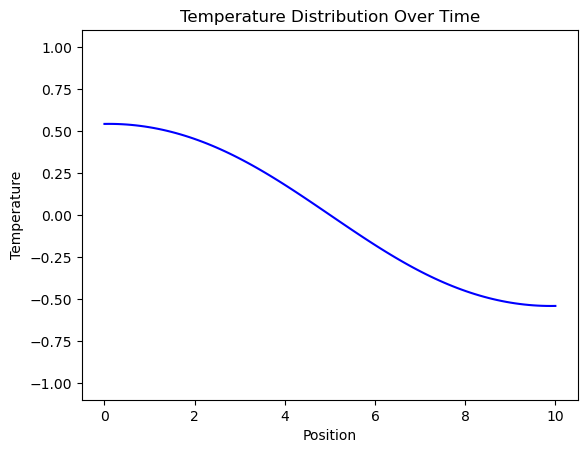

In [12]:
# Downsample frames (e.g., use every 5th frame)
downsample_factor = 50
downsampled_simulation = simulation[::downsample_factor]
downsampled_t_values = t_values[::downsample_factor]

# Function to update the plot for each frame of the animation
def update(frame):
    line.set_ydata(downsampled_simulation[frame])
    return line,

# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot(x_values, downsampled_simulation[0], color='blue')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(len(downsampled_t_values)), interval=10, blit=True)

plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Temperature Distribution Over Time')

# Save the animation as an MP4 file with lower DPI
ani.save('simulation_animation.mp4', writer='ffmpeg', dpi=200)